---

# Introduction to GPT-1 and GPT-2 with HuggingFace

Welcome to this Colab notebook where we will explore and experiment with two groundbreaking models in the world of Natural Language Processing (NLP) - GPT-1 and GPT-2. These models, developed by OpenAI, have been at the forefront of advancing the capabilities of language models.

## Overview:

### GPT-1:
The first iteration, GPT-1, laid the foundation for transformer-based architectures in NLP tasks. It introduced the concept of using a transformer structure without the need for task-specific training data, setting the stage for future models.

#### Key Takeaways from our GPT-1 Exploration:
1. **Model Variants**: GPT-1 offers several variants including the base model (`OpenAIGPTModel`) and versions with language modeling heads (`OpenAIGPTLMHeadModel`).
2. **Embeddings**: We looked at how GPT-1 can be used to generate rich embeddings for downstream tasks.
3. **Fine-tuning**: The possibility of fine-tuning GPT-1 for specific tasks was explored, showcasing its versatility.
4. **Text Generation**: Using the `OpenAIGPTLMHeadModel`, we generated text based on given prompts.

### GPT-2:
Building on the success of GPT-1, GPT-2 brought improvements in size, training data, and architecture. It's known for its ability to generate coherent and contextually relevant paragraphs of text.

#### Key Takeaways from our GPT-2 Exploration:
1. **Model Sizes**: GPT-2 is available in different sizes, with the small, medium, large, and extra-large variants.
2. **Improved Text Generation**: We delved into text generation capabilities of GPT-2, observing its prowess in generating more coherent and diverse text compared to its predecessor.
3. **Chatbot Creation**: A step-by-step demonstration was provided to harness GPT-2's capabilities to create a basic chatbot.
4. **Tokenization**: The importance of tokenization and attention mechanisms were highlighted, especially in the context of generating meaningful outputs.

## Summary:
Throughout this notebook, we used models available from the HuggingFace library, a popular platform for state-of-the-art NLP models. Our journey began with understanding the architecture and capabilities of GPT-1, moving on to its successor, GPT-2. Practical implementations, ranging from text generation to chatbot creation, provided hands-on experience and insights into the capabilities and potential applications of these models.

Feel free to experiment, tweak parameters, and explore further to gain a deeper understanding of the world of Generative Pre-trained Transformers!

---

# The original GPT

The original GPT, developed by OpenAI, was a landmark in the application of Transformer architectures for language modeling. It paved the way for many successor models, most notably GPT-2 and GPT-3. When we discuss different "models" for GPT, we're primarily referring to variations in its architecture, size, and pre-trained weights. Let's dive into the different aspects step-by-step:

### Step 1: Understanding the Architecture

1. **Base Architecture**: The original GPT uses a Transformer architecture, specifically the decoder part of it. Unlike the full Transformer which has both an encoder and a decoder, GPT uses only the decoder stacks.

2. **Direction of Information Flow**: The GPT model is trained to predict the next word in a sequence, so it's a unidirectional model. This means that each word can only attend to previous words in the sequence, not future words.

### Step 2: Model Sizes

The number of parameters in a model, which often correlates with its size and capacity, determines its ability to understand and generate intricate text patterns. For GPT:

1. **Small**: This is the smallest variant with the fewest parameters. It's faster and requires less memory but might not perform as well as the larger variants on complex tasks.
  
2. **Medium**: A middle-ground in terms of size and performance.

3. **Large**: The largest variant of the original GPT with the most parameters. It's expected to perform best on tasks but is slower and demands more memory.

### Step 3: Pre-trained Weights

1. **Pre-training on Large Corpora**: Like other Transformer models, GPT is pre-trained on large text corpora. This gives it a vast knowledge of language, enabling it to generate coherent and contextually relevant text.

2. **Fine-tuning**: After pre-training, GPT can be fine-tuned on specific tasks, like translation, summarization, or question-answering, to make it more specialized.

### Step 4: Model Variants in the Hugging Face Library

If you're using the Hugging Face `transformers` library, you'll notice different classes for GPT:

1. **OpenAIGPTModel**: This is the base model which outputs raw hidden states. It doesn't have a head attached, meaning you can't directly get the next word probabilities.

2. **OpenAIGPTLMHeadModel**: This is the model with a language modeling head on top. It's used for tasks like text generation.

3. **OpenAIGPTDoubleHeadsModel**: This model has two heads: one for language modeling and another for multiple choice tasks. It can be used when you have tasks that require both predicting the next word and selecting an answer from multiple choices.

By understanding these aspects of the original GPT, you can make informed decisions about which variant to use based on your specific requirements, be it general language modeling, text generation, or more specialized tasks.

# `OpenAIGPTModel`

## How to explore `OpenAIGPTModel`

The `OpenAIGPTModel` is the base model class which provides the raw hidden states of the GPT architecture. This means it doesn't have any specific head attached to it for tasks like language modeling or multiple-choice. Instead, it provides the foundational Transformer outputs which can be used for various downstream tasks.

Let's explore the `OpenAIGPTModel` step-by-step:

### Step 1: Install and Import Necessary Libraries

```python
!pip install transformers

from transformers import OpenAIGPTModel, OpenAIGPTTokenizer
```

### Step 2: Load the Tokenizer and Model

```python
model_name = 'openai-gpt'
tokenizer = OpenAIGPTTokenizer.from_pretrained(model_name)
model = OpenAIGPTModel.from_pretrained(model_name)
```

### Step 3: Tokenize an Input and Get Model Output

```python
input_text = "Hello, my dog is cute"
inputs = tokenizer(input_text, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state
```

The `last_hidden_states` here contains the raw hidden activations from the final Transformer layer for each token in your input.

### Step 4: Inspect the Output

You can examine the shape and values of the `last_hidden_states`:

```python
print(last_hidden_states.shape)
```

This will give you a shape likely in the format `[1, num_tokens, hidden_size]`, where `num_tokens` is the token count in your input and `hidden_size` is the size of the hidden layer (typically 768 for the base model).

### Step 5: Interpretation

- The output you get from this model are essentially embeddings for each token in your input sentence. These embeddings are context-aware, meaning they represent the meaning of each word in the context of the given sentence.
  
- Since there's no specific head (like a language modeling or classification head) attached to this model, the embeddings aren't directly interpretable as probabilities or labels. Instead, they serve as rich, high-dimensional representations of your input text.

- You can use these embeddings as input features for various downstream tasks, such as classification, clustering, or even further fine-tuning with a custom head.

Remember, the main distinction of the `OpenAIGPTModel` is that it provides raw, context-rich embeddings without any task-specific predictions. It offers the foundational outputs of the GPT architecture. If you want outputs tailored to specific tasks (like text generation or multiple-choice selection), you'd use one of the other GPT model classes.

## `OpenAIGPTModel`: From Input to Output


### Processing - From Input to Output

1. **Tokenization**:
    - The input text is tokenized into subwords or words. This is done using a predefined vocabulary that the tokenizer has been trained on.
    - The tokens are then converted into integer IDs that correspond to embeddings in the model's embedding layer.

2. **Embedding Layer**:
    - The token IDs are passed through an embedding layer that converts each token ID into a high-dimensional vector. This vector is a learned representation of each token.

3. **Transformer Layers**:
    - These embeddings are then processed by several Transformer decoder blocks. Each block has two main components:
        - **Self Attention Mechanism**: This allows the model to weigh the importance of different words in the input relative to a particular word. It's how context is incorporated into each token's representation.
        - **Feed-Forward Neural Network**: After the attention scores are computed and applied, the result for each token is passed through a feed-forward network.
    - As data passes through each successive Transformer layer, the representations become more abstract and context-rich.

4. **Output**:
    - The output of the final Transformer layer is what's returned by `OpenAIGPTModel`. These are the "last hidden states" and represent context-aware embeddings for each token in the input.



## Architecture in Terms of Tensor Sizes

### Step 1: Embedding Size

Yes, for the base version of the GPT model, each token in the input is represented by a 768-dimensional vector after being passed through the model's embedding layer.

**Terminology**:
- The 768-dimensional vector is often referred to as an "embedding" or a "representation". The number 768 is the "hidden size" or "embedding size" of the model.

### Step 2: Model Code on GitHub

The Hugging Face `transformers` library, which provides implementations of GPT (and many other models), is open-source and available on GitHub. You can find the code for GPT and its variants in this repository: [Hugging Face Transformers GitHub](https://github.com/huggingface/transformers)

Inside the repository, the model-specific code for GPT can be found under the `modeling_openai.py` file (or a similarly named file, as the structure might evolve).

### Step 3: Describing the Architecture in Terms of Tensor Sizes

Let's take an input sentence of `N` tokens. Here's how the tensor sizes change through the GPT model:

1. **Input Tokens**:
    - Shape: \([1, N]\)
    - The input is a sequence of token IDs.

2. **Embedding Layer**:
    - Shape: \([1, N, 768]\)
    - Each token ID is mapped to a 768-dimensional embedding.

3. **Transformer Layers**:
    - GPT has multiple such layers. For each layer:
        - **Self Attention**:
            - **Query, Key, Value matrices**: Shape \([1, N, 768]\)
            - **Attention Scores**: Shape \([1, N, N]\)
            - **Attention Output**: Shape \([1, N, 768]\)
        - **Feed-Forward Neural Network**:
            - Maintains the shape \([1, N, 768]\) throughout.

    The number of Transformer layers depends on the specific variant of GPT you're using. The base model has 12 layers, meaning the above operations are repeated 12 times.

4. **Output**:
    - Shape: \([1, N, 768]\)
    - After the final Transformer layer, you get the context-rich representations for each of the `N` tokens.

This is a high-level overview. Inside each Transformer layer, there are more operations like layer normalization and residual connections, but the tensor sizes mentioned above remain consistent through those operations.

By understanding the tensor sizes at each step, you get a clearer picture of how data flows through the model and how the final representations are derived.

## `OpenAIGPTTokenizer`

The tokenizer plays a crucial role in preparing the input data for the model. Let's dive into the details of the tokenizer used for the original GPT (`OpenAIGPTTokenizer`):

### Step 1: Role of a Tokenizer

A tokenizer's primary role is to convert input text into a format suitable for the model. This typically involves:
1. Splitting the text into smaller chunks called tokens.
2. Mapping each token to a unique integer ID, which the model can process.

### Step 2: Type of Tokenizer for GPT

For GPT, the tokenizer used is a Byte-Pair Encoding (BPE) tokenizer.

### Step 3: Understanding BPE

Byte-Pair Encoding (BPE) is a subword tokenizer. It starts with character-level tokenization and then iteratively merges frequent pairs of characters or character sequences to form more complex tokens. This continues until a predefined number of merges have been made, which results in a vocabulary of both full words and common subwords or character combinations.

**Advantages**:
1. **Flexibility**: It can handle words not seen during training because it can break them down into known subword units.
2. **Efficiency**: BPE strikes a balance between character-level tokenization (which is very granular and results in long sequences) and word-level tokenization (which can't handle out-of-vocabulary words).

### Step 4: Special Tokens

The tokenizer also handles special tokens, such as:
- `<|endoftext|>`: Used to indicate the end of a text in GPT.
- Others like padding tokens, if defined.

### Step 5: Methods in the Tokenizer

When you call methods like `tokenizer.encode()` or `tokenizer.decode()`, you're utilizing the BPE process and the model's specific vocabulary to convert between text and token IDs.

### Conclusion:

The `OpenAIGPTTokenizer` is a BPE-based tokenizer tailored for the original GPT. It ensures that the model receives input in the expected format, efficiently tokenizing text into a mix of whole words and subword units, providing a balance between granularity and coverage. This tokenizer is crucial in allowing GPT to handle a wide range of text inputs and generate coherent and contextually relevant outputs.

## What is `OpenAIGPTModel` used for?

### Use Cases for OpenAIGPTModel

1. **Feature Extraction for Downstream Tasks**: The context-rich embeddings can be used as features for tasks like text classification, sentiment analysis, or named entity recognition.

2. **Transfer Learning**: You can add a custom head on top of the model and fine-tune it for a specific task, leveraging the pre-trained knowledge of GPT.

3. **Embedding Visualization**: To understand and visualize semantic relationships between words or sentences in a high-dimensional space.

### Fancy Embeddings?

- Yes, in a way. The primary difference between these embeddings and simpler methods is the context-awareness. While methods like Word2Vec or GloVe give a single embedding for each word regardless of its usage, the `OpenAIGPTModel` provides embeddings that change based on the word's context in a sentence.

### Comparison with Other Embedding Methods

1. **Static Embeddings (Word2Vec, GloVe)**:
    - Produce a single, fixed embedding for each word.
    - Don't account for polysemy (words with multiple meanings).
    - Computationally less expensive.

2. **Contextual Embeddings (ELMo)**:
    - Produce different embeddings for words based on their context.
    - Use LSTM-based architectures, so they consider sequential information.

3. **Transformer-based Embeddings (BERT, GPT)**:
    - Also produce context-aware embeddings but leverage the Transformer architecture.
    - Typically have a higher capacity due to more parameters and layers.
    - More computationally intensive but often achieve state-of-the-art performance.

In conclusion, the `OpenAIGPTModel` provides a method to obtain context-aware embeddings from a Transformer architecture. While it's more computationally expensive than traditional embedding methods, it captures nuances and relationships in the data more effectively, making it valuable for a variety of NLP tasks.

## Understanding the use cases


### Step 1: Understanding the Use Cases

1. **Feature Extraction for Downstream Tasks**: This involves taking pre-trained models like GPT and using them to obtain embeddings or representations of the data. These embeddings serve as "features" which can then be used by another model or algorithm for a specific task.
  
2. **Transfer Learning**: This is the process of taking a pre-trained model and fine-tuning it on a smaller, task-specific dataset. By doing so, the model not only retains the knowledge it gained during its initial pre-training but also learns the specifics of the new task.

3. **Embedding Visualization**: This is more about understanding and interpretation. Once embeddings are obtained, they can be visualized (often after dimensionality reduction) to understand the semantic relationships in the data.

### Step 2: Categorizing Our Discussions

1. **Using GPT for Embeddings (No Fine-tuning)**: This is purely "Feature Extraction for Downstream Tasks". We are using GPT's knowledge to obtain a representation of the data which can then be used in various ways, but we're not updating GPT's weights.

2. **Fine-tuning GPT for a Specific Task (e.g., Sentiment Classification)**: This primarily falls under "Transfer Learning". We're adjusting GPT's pre-trained weights to better suit our specific task. However, one could argue that the embeddings we obtain during this process (from the last hidden layer before the custom head) are also a form of "Feature Extraction for Downstream Tasks", since they are used as features for the sentiment classification task. But the key distinction is that these embeddings are dynamic and are being refined as we fine-tune the model.

### Conclusion:

Both scenarios we discussed relate to "Feature Extraction for Downstream Tasks" but in slightly different ways:

- When using GPT without fine-tuning, we're statically extracting features based on the model's pre-trained knowledge.
  
- When fine-tuning GPT, while we are indeed leveraging the model's embeddings (features) for our specific task, the process primarily aligns with "Transfer Learning" since we're updating the model's weights based on our task-specific data. However, since these refined embeddings are used for the task, it also has an element of "Feature Extraction for Downstream Tasks".

## `OpenAIGPTModel` in action

In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.4 MB/s eta 0:00:00


In [ ]:
from transformers import OpenAIGPTModel, OpenAIGPTTokenizer

In [ ]:
model_name = 'openai-gpt'
tokenizer = OpenAIGPTTokenizer.from_pretrained(model_name)
model = OpenAIGPTModel.from_pretrained(model_name)

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


In [ ]:
input_text = "Lets see some embeddings"
inputs = tokenizer(input_text, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state



In [ ]:
last_hidden_states.shape

torch.Size([1, 5, 768])

In [ ]:
last_hidden_states[0][1][:100]

tensor([-5.4339e-01,  2.6350e-01,  6.4532e-02,  2.2958e-01,  1.6679e-01,
        -2.8019e-01, -3.6579e-01, -6.6992e-01, -2.7126e-02,  6.8713e-01,
         1.6432e-01,  5.7140e-01,  3.9758e-01,  4.1600e-01,  5.8372e-01,
         9.1655e-01, -2.4924e-01, -2.4103e-01,  4.5438e-02,  6.3906e-01,
         4.3120e-01, -1.4009e-01, -1.0626e-01, -7.7060e-01, -1.4231e-01,
         2.3918e-01,  2.1953e-01, -2.9330e-01, -2.5660e-01, -1.3852e-01,
         1.7396e-01, -4.4185e-01,  2.9353e-01, -6.9858e-01, -6.0446e-02,
         3.6202e-02,  1.4981e-01,  1.1931e-01,  1.9105e-01, -2.1720e-01,
         1.3792e-01,  2.9405e-01, -2.7587e-01,  6.7012e-02,  6.2635e-01,
         2.1303e-01, -1.7063e-04,  6.7428e-02, -9.0618e-01, -9.7202e-01,
         3.6795e-01, -4.3658e-01,  1.7653e-01,  2.5039e-02,  1.0016e-01,
         1.5063e-01,  1.5239e-01, -1.6045e-02,  7.8693e-02,  1.1535e-01,
         5.6031e-02,  7.3233e-01, -1.7351e-01, -4.6189e-01, -1.9365e-01,
         3.2181e-02, -4.7779e-03, -3.9645e-01,  2.1

## Use Case 1: Feature Extraction for Downstream Tasks

In [ ]:
!pip install transformers torch

import torch
from transformers import OpenAIGPTModel, OpenAIGPTTokenizer
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.4 MB/s eta 0:00:00


In [ ]:
model_name = 'openai-gpt'
tokenizer = OpenAIGPTTokenizer.from_pretrained(model_name)
model = OpenAIGPTModel.from_pretrained(model_name)

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


In [ ]:
# tokenizer.add_special_tokens({'pad_token': '[PAD]'})
# model.resize_token_embeddings(len(tokenizer))

# Use an existing token as the padding token
tokenizer.pad_token = tokenizer.unk_token


In [ ]:
sentences = ["I love this!", "This is amazing.", "Not a fan of this.", "This is mediocre.", "Absolutely love it!"]
labels = [1, 1, 0, 0, 1]

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        label = self.labels[idx]
        tokens = self.tokenizer(sentence, return_tensors="pt", padding="max_length", truncation=True, max_length=50)
        return tokens.input_ids.squeeze(), torch.tensor(label)

In [ ]:
class SentimentClassifier(nn.Module):
    def __init__(self, gpt_model):
        super(SentimentClassifier, self).__init__()
        self.gpt = gpt_model
        self.linear = nn.Linear(768, 1)  # 768 is the size of GPT embeddings

    def forward(self, input_ids):
        embeddings = self.gpt(input_ids).last_hidden_state
        embeddings = embeddings.mean(dim=1)  # Average embeddings of all tokens to get a single vector for the sentence
        output = self.linear(embeddings)
        return torch.sigmoid(output).view(-1, 1)

In [ ]:
%%time

# Hyperparameters
learning_rate = 0.001
epochs = 10

# Model, Loss, Optimizer
classifier = SentimentClassifier(model)
criterion = nn.BCELoss()
optimizer = optim.Adam(classifier.parameters(), lr=learning_rate)

# DataLoader
dataset = SentimentDataset(sentences, labels, tokenizer)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Training loop
for epoch in range(epochs):
    for input_ids, label in dataloader:
        optimizer.zero_grad()
        output = classifier(input_ids).squeeze(-1)
        print(output.shape)
        print(label.shape)



        loss = criterion(output, label.float())
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([1])
torch.Size([1])
Epoch 1/10, Loss: 3.1351914405822754
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([1])
torch.Size([1])
Epoch 2/10, Loss: 1.4370181560516357
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([1])
torch.Size([1])
Epoch 3/10, Loss: 0.6105945110321045
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([1])
torch.Size([1])
Epoch 4/10, Loss: 1.0912686586380005
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([1])
torch.Size([1])
Epoch 5/10, Loss: 0.5456282496452332
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([1])
torch.Size([1])
Epoch 6/10, Loss: 1.1690982580184937
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([1])
torch.Size([1])
Epoch 7/10, Loss: 0.6408752799034119
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch

In [ ]:
total_params = sum(p.numel() for p in classifier.parameters())
print(f"Total parameters in the model: {total_params}")

Total parameters in the model: 116535553


### A simple text classification task

Let's choose the first use case: "Feature Extraction for Downstream Tasks" and demonstrate it with a simple text classification task. We'll use the embeddings from the `OpenAIGPTModel` as features to classify sentences into two hypothetical categories: positive and negative sentiment.

### Step 1: Install and Import Necessary Libraries

Assuming you're in a Colab or Jupyter environment:

```python
!pip install transformers torch

import torch
from transformers import OpenAIGPTModel, OpenAIGPTTokenizer
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
```

### Step 2: Load the Tokenizer and Model

```python
model_name = 'openai-gpt'
tokenizer = OpenAIGPTTokenizer.from_pretrained(model_name)
model = OpenAIGPTModel.from_pretrained(model_name)
```

### Step 3: Create a Dataset

For simplicity, let's assume we have the following small dataset of sentences and their corresponding sentiments (1 for positive and 0 for negative):

```python
sentences = ["I love this!", "This is amazing.", "Not a fan of this.", "This is mediocre.", "Absolutely love it!"]
labels = [1, 1, 0, 0, 1]
```

We'll define a PyTorch `Dataset` to manage our data:

```python
class SentimentDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        label = self.labels[idx]
        tokens = self.tokenizer(sentence, return_tensors="pt", padding="max_length", truncation=True, max_length=50)
        return tokens.input_ids.squeeze(), torch.tensor(label)
```

### Step 4: Create a Classifier using GPT Embeddings

We'll add a simple linear layer on top of the GPT embeddings to classify the sentences.

```python
class SentimentClassifier(nn.Module):
    def __init__(self, gpt_model):
        super(SentimentClassifier, self).__init__()
        self.gpt = gpt_model
        self.linear = nn.Linear(768, 1)  # 768 is the size of GPT embeddings

    def forward(self, input_ids):
        embeddings = self.gpt(input_ids).last_hidden_state
        embeddings = embeddings.mean(dim=1)  # Average embeddings of all tokens to get a single vector for the sentence
        output = self.linear(embeddings)
        return torch.sigmoid(output)
```

### Step 5: Train the Classifier

Now, we'll train this classifier on our small dataset.

```python
# Hyperparameters
learning_rate = 0.001
epochs = 10

# Model, Loss, Optimizer
classifier = SentimentClassifier(model)
criterion = nn.BCELoss()
optimizer = optim.Adam(classifier.parameters(), lr=learning_rate)

# DataLoader
dataset = SentimentDataset(sentences, labels, tokenizer)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Training loop
for epoch in range(epochs):
    for input_ids, label in dataloader:
        optimizer.zero_grad()
        output = classifier(input_ids).squeeze()
        loss = criterion(output, label.float())
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")
```

This example demonstrates how to use the context-rich embeddings from the `OpenAIGPTModel` for a downstream task like sentiment classification. While the dataset is artificially small for demonstration purposes, in real-world applications, you'd apply a similar approach to much larger datasets for more robust and accurate results.

### Why did training on a tiny dataset take so long?

### Step 1: Model Complexity

**Factor**: The architecture of the model itself can impact training time. The `OpenAIGPTModel` is a transformer-based model which, even though you're only using it for feature extraction and not for generating sequences, can be computationally intensive due to its multiple layers and attention mechanisms.

**Diagnosis**: Check the number of parameters in the `SentimentClassifier`:

```python
total_params = sum(p.numel() for p in classifier.parameters())
print(f"Total parameters in the model: {total_params}")
```

### Step 2: Data Processing

**Factor**: Tokenization and batching can also take up time, especially if you're not using optimized data loading techniques.

**Diagnosis**:
1. Time the tokenization process separately to see how long it takes.
2. Time the data loading from the `DataLoader` in isolation to see if batching is slowing things down.

### Step 3: Training Loop Operations

**Factor**: Operations inside the training loop, like the forward pass, backward pass, loss computation, and optimizer step, all contribute to the training time.

**Diagnosis**:
1. Time each operation inside the training loop separately to understand which operation is the most time-consuming.
2. Check for any unnecessary computations or operations inside the loop.

### Step 4: Hardware Constraints

**Factor**: The type of hardware being used can significantly impact training times. Training on a CPU will generally be slower than training on a GPU, especially for deep learning models.

**Diagnosis**:
1. Check if you're training on a GPU. If you're using PyTorch, you can confirm with `torch.cuda.is_available()`.
2. If you're on a GPU, check its utilization. Sometimes, the GPU isn't fully utilized due to bottlenecks elsewhere (like data loading).

### Step 5: External Factors

**Factor**: Other processes running on your machine can slow down training. If your CPU or GPU is being utilized by other tasks, it can impact the performance of your training process.

**Diagnosis**:
1. Monitor CPU and GPU usage to see if they're being heavily used by processes other than your training script.
2. If you're using a shared environment (like some cloud platforms), there might be constraints imposed on resources.

### Step 6: Optimizations

**Actions**:
1. If data loading is a bottleneck, consider using `torch.utils.data.DataLoader` with the `num_workers` parameter set to a value greater than 1 to enable parallel loading of data.
2. If the model's computations are the bottleneck, consider using a simpler architecture for preliminary tests or reduce the number of layers/parameters in the model.
3. Ensure that all tensors and the model are moved to the GPU (if available) for faster computation.

By systematically diagnosing each step, you can pinpoint where the majority of the time is being spent and then take appropriate actions to optimize the training process.

### Model Size and Pre-training

### Step 1: Model Size and Pre-training

**Factor**: The GPT model, with its 100 million parameters, is undoubtedly a large model.

**Clarification**: Yes, the model you've loaded from Hugging Face is pre-trained. Pre-training means the model has already been trained on a large dataset (like web text) to learn a language representation. However, when you're fine-tuning it on your dataset (`sentences`), you're adjusting these pre-trained weights to better suit your specific task. Even though it's pre-trained, the forward and backward passes during training still involve computations on all these 100 million parameters.

### Step 2: Forward and Backward Passes

**Factor**: Every epoch involves a forward pass (computing predictions) and a backward pass (computing gradients) for every batch. For models with many parameters, like GPT, these operations are computationally intensive.

### Step 3: Optimizer Step

**Factor**: The `optimizer.step()` updates the model's weights. For large models, this can also be time-consuming.

### Step 4: Data Loading and Processing

**Factor**: While your dataset is small, tokenization and data loading steps can still introduce some overhead, especially if the tokenization process isn't optimized.

### Step 5: Hardware Constraints

**Factor**: If you're running the training on a CPU, it will be considerably slower than on a GPU. Even if you are on a GPU, the specific type and its available memory can affect the speed.

### Step 6: Other Overheads

**Factor**: The `print` statements inside the loop, while seemingly innocuous, can introduce some overhead, especially if they're executed many times.

### Step 7: Diagnosing the Time Consumption

**Action**:

1. Time different sections of your loop to see where the most time is spent. For instance:
   
   ```python
   start = time.time()
   output = classifier(input_ids).squeeze(-1)
   forward_time = time.time() - start
   
   start = time.time()
   loss.backward()
   backward_time = time.time() - start
   ```

   This will give you a clearer picture of which operation is the most time-consuming.

2. Check if you're running on GPU. If not, and you have access to one, move your model and data to the GPU. This can significantly accelerate the training process.

### Conclusion:

Given that the GPT model is large, even with a small dataset, the time taken per epoch isn't surprising. The forward and backward passes through a model with 100 million parameters can be time-consuming, especially if you're not using a high-end GPU. To reduce the training time, consider using a GPU if you aren't already, and profile different parts of your training loop to identify and address any specific bottlenecks.

### Extract embeddings with fine-tuning

### Step 1: Understanding Pre-trained Models

**Pre-trained Models**: These are models that have been trained on vast amounts of data, often on tasks like language modeling. The idea is that these models, through their extensive training, have learned a rich representation of the language. For example, GPT has been trained on vast amounts of text from the internet, so it has gained a deep understanding of language structure, semantics, and even some world knowledge.

### Step 2: The "Black Box" Perception

**Embeddings and Features**: When people refer to using models like GPT as a "black box" or a "lego block," they often mean that they use the model to extract embeddings or features from the data without altering the model itself. In this scenario, the GPT model is kept static, and only its output (embeddings) is used as input for another model or task.

### Step 3: Fine-tuning

**Adjusting to Specific Tasks**: Instead of just extracting features and leaving the GPT model untouched, you can further train (or fine-tune) it on a specific task, like sentiment analysis. During this process, the weights of the GPT model get adjusted based on the new data and the specific task, allowing it to become more specialized.

**Benefits**: Fine-tuning can lead to better performance on the specific task because the model not only leverages the general language knowledge it gained during pre-training but also the specific insights from the new data.

### Step 4: An Analogy

**Generalist to Specialist**: Imagine a medical doctor who has a broad understanding of medicine from medical school (akin to the GPT model's pre-training). This doctor then decides to specialize in cardiology and undergoes additional training (akin to fine-tuning). Now, this doctor is not just relying on the broad medical knowledge but is also an expert in cardiology. Similarly, by fine-tuning GPT, you're specializing it for a particular task.

### Step 5: Potential Pitfalls

**Overfitting**: Since models like GPT have a large number of parameters, they can easily overfit to a small dataset. This means that while they might perform exceptionally well on the training data, they might not generalize well to new, unseen data. Regularization techniques, early stopping, or even using a smaller version of the model can be strategies to combat this.

### Conclusion:

Using GPT for embeddings can be thought of as leveraging its broad knowledge of language. However, when you fine-tune GPT on a specific dataset, you're specializing it for a particular task, making it more adept at that task but at the risk of overfitting if not careful. This process harnesses both the general language understanding of the pre-trained model and the specific nuances of the new dataset to achieve better performance.

### Extract embeddings without fine-tuning

The GPT model can be used to extract embeddings without fine-tuning. In many applications, especially when the downstream dataset is small, using GPT (or similar models) just for embeddings can be quite beneficial. Let's break down this process step-by-step.

### Step 1: Using GPT for Embeddings

**Concept**: When using GPT purely for embeddings, you're leveraging the knowledge that GPT has gained during its pre-training phase. You feed your text into the model and obtain a representation (embedding) of the text from one of the model's layers.

### Step 2: Choosing the Embedding Layer

**Which Layer to Use?**:
1. **Last Hidden State**: This is the most common choice. It represents the final output of the GPT model's layers for each token in the input.
2. **Aggregated States**: You can average (or max) the last hidden states across all tokens to get a fixed-size representation for variable-length texts.

### Step 3: Setting Up the Process

1. **Load the GPT Model and Tokenizer**:
   
   ```python
   model_name = 'openai-gpt'
   tokenizer = OpenAIGPTTokenizer.from_pretrained(model_name)
   model = OpenAIGPTModel.from_pretrained(model_name)
   ```

2. **Tokenize and Obtain Embeddings**:
   
   ```python
   inputs = tokenizer("Your text here", return_tensors="pt")
   with torch.no_grad():  # We don't need gradients for embedding extraction
       outputs = model(**inputs)
   embeddings = outputs.last_hidden_state
   ```

3. **Aggregate Embeddings (Optional)**:
   
   If you need a fixed-size representation, you can average the embeddings:
   
   ```python
   aggregated_embedding = embeddings.mean(dim=1)
   ```

### Step 4: Using the Embeddings

Once you have the embeddings:
1. **Downstream Tasks**: You can feed these embeddings into another model (e.g., a classifier or regressor) depending on your task.
2. **Similarity and Clustering**: The embeddings can be used to find similar texts or for clustering.

### Step 5: Considerations

1. **Static vs. Dynamic**: When used this way, GPT acts as a static feature extractor. The weights aren't updated based on the downstream task, which might be desirable if you have a small dataset or if you want to avoid the risk of overfitting.
2. **Computational Efficiency**: Without the need for fine-tuning, using GPT purely for embeddings can be computationally more efficient during the downstream training process. This is because you'd only run the GPT model once for each text to get its embedding, rather than during each epoch of training.

### Conclusion:

Using GPT just for embeddings means leveraging its pre-trained knowledge as a static feature extractor. This approach can be beneficial for small datasets or when you want a computationally efficient method to obtain rich text representations without modifying the original GPT weights.

### Debugging some problems

### Step 1: The Problem

**Problem Description**:
During the training loop of a binary classification task using the `SentimentClassifier`, an error arose when processing batches of data, specifically when dealing with the last batch which contained only one item.

**Symptoms**:
1. Training worked fine for complete batches (of size 2), but threw an error when encountering the last batch (of size 1).
2. The error indicated a shape mismatch, with the model's output tensor having an unexpected empty shape `torch.Size([])` for batches of size 1, while the label tensor had a shape `torch.Size([1])`.

**Root Cause**:
The classifier, when given input with a single sentence, produced an output with an inconsistent shape, compared to when it was given multiple sentences.

### Step 2: The Solution

**Solution Description**:
The solution involved ensuring that the classifier's output always has a consistent shape regardless of the batch size. This was achieved by reshaping the output tensor to have at least two dimensions.

**Actions Taken**:
1. Modified the `forward` method in the `SentimentClassifier` to reshape its output using `.view(-1, 1)`. This ensured that the output always had a shape of `[batch_size, 1]`.
   
   Before: For batch sizes > 1, output shape was `[batch_size, 1]`. For a batch size of 1, output shape was `[]`.
   
   After: For all batch sizes, output shape became `[batch_size, 1]`.

2. Simplified the training loop to squeeze the last dimension of the classifier's output using `.squeeze(-1)`, transforming its shape from `[batch_size, 1]` to `[batch_size]`.

### Step 3: Summary

In the process of training a binary classification model using batches of sentences, we encountered an inconsistency in tensor shapes when processing incomplete batches. The root of the issue was the classifier producing an inconsistent output shape when given single-item batches. This problem was addressed by ensuring that the classifier's output always had a consistent shape. The use of the `squeeze` method in the training loop was then streamlined, as the classifier's output was made consistent across all batch sizes. This resolved the shape-related errors and allowed for successful training.

## Use Case 3: Visualizing Embeddings

### Visualization

Visualizing embeddings can provide a lot of insight into the semantic relationships learned by the model. Let's break this down step-by-step:

### Step 1: Obtain Embeddings

**Objective**: First, we need to obtain embeddings for a set of sentences or words that we're interested in visualizing.

```python
model_name = 'openai-gpt'
tokenizer = OpenAIGPTTokenizer.from_pretrained(model_name)
model = OpenAIGPTModel.from_pretrained(model_name)

sentences = ["I love dogs", "Cats are wonderful", "Birds fly", "Fish swim", "I dislike rain", "Sunshine makes me happy"]

# Tokenize and obtain embeddings
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
with torch.no_grad():
    outputs = model(**inputs)
embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
```

Here, we average the embeddings across tokens for each sentence to get a fixed-size representation.

### Step 2: Dimensionality Reduction

**Objective**: Embeddings are usually high-dimensional (e.g., 768 dimensions for GPT). For visualization, we need to reduce this to 2 or 3 dimensions.

Common methods include:
- PCA (Principal Component Analysis)
- t-SNE (t-distributed Stochastic Neighbor Embedding)

Here's how you can use PCA:

```python
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
```

### Step 3: Visualization

Now, with the reduced-dimensional embeddings, we can plot them:

```python
import matplotlib.pyplot as plt

x = reduced_embeddings[:, 0]
y = reduced_embeddings[:, 1]

plt.figure(figsize=(10, 7))
plt.scatter(x, y, marker='o')

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (x[i], y[i]))
    
plt.title("Visualization of Sentence Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()
```

### Conclusion:

In this example, sentences that are semantically closer to each other should ideally appear closer together in the plot. For instance, sentences about animals might cluster together, and those about feelings or weather might form another cluster. It's a powerful way to visually inspect the kind of semantic information captured by the model in its embeddings. Keep in mind that the effectiveness of the visualization can sometimes depend on the dimensionality reduction method and its parameters.

### The process of obtaining embeddings from the GPT model's outputs

### Step 1: Understanding the Model's Output

When we pass our tokenized inputs to the GPT model, the model returns an instance of `BaseModelOutput`. For the `OpenAIGPTModel`, this object primarily contains:

- `last_hidden_state`: This is a tensor of shape `(batch_size, sequence_length, hidden_size)`. Each token in the input sequence is represented by a vector of size `hidden_size` (768 for GPT).

For example, if you have a batch of 2 sentences and each sentence has 10 tokens (after tokenization), the shape of `last_hidden_state` would be `(2, 10, 768)`.

### Step 2: Aggregating the Embeddings

The objective now is to convert these embeddings from a 3D tensor to a 2D tensor where each sentence (or sequence) gets a single vector representation. One common way to do this is by averaging the embeddings of all tokens for each sentence.

```python
embeddings = outputs.last_hidden_state.mean(dim=1)
```

Here's the breakdown:

- `outputs.last_hidden_state`: As explained, this accesses the tensor of shape `(batch_size, sequence_length, hidden_size)`.
  
- `.mean(dim=1)`: This computes the mean across the `sequence_length` dimension, effectively averaging the token embeddings for each sentence in the batch. The resulting shape is `(batch_size, hidden_size)`, or in our example `(2, 768)`.

### Step 3: Converting to Numpy

For many downstream tasks or libraries (like scikit-learn for PCA), it's often convenient to work with numpy arrays rather than PyTorch tensors. The conversion is straightforward:

```python
embeddings_numpy = embeddings.numpy()
```

This gives us a 2D numpy array with the shape `(batch_size, hidden_size)`.

### Conclusion:

To summarize, when we pass our input data through the GPT model, we get a detailed representation for each token in the input. By averaging these token-wise representations, we obtain a single vector for each sequence or sentence in our input. This vector is a high-dimensional embedding that captures the semantic essence of the input sentence. By visualizing or using these embeddings in downstream tasks, we leverage the rich semantic information encoded by the GPT model.

# `OpenAIGPTLMHeadModel`

## `OpenAIGPTLMHeadModel` in action

The `OpenAIGPTLMHeadModel` is a version of the GPT-1 model that has an additional linear layer (the "LM head") on top of the base model, which makes it suitable for language modeling tasks. Here's how you can use it:

### Step 1: Import Necessary Libraries and Load the Model

First, we'll need to load the model and its corresponding tokenizer.

```python
from transformers import OpenAIGPTTokenizer, OpenAIGPTLMHeadModel

model_name = 'openai-gpt'
tokenizer = OpenAIGPTTokenizer.from_pretrained(model_name)
model = OpenAIGPTLMHeadModel.from_pretrained(model_name)
```

### Step 2: Tokenization

Now, let's tokenize a sample sentence.

```python
input_text = "The quick brown fox"
inputs = tokenizer(input_text, return_tensors="pt")
```

### Step 3: Generating Text

To generate text using the model, you can use the `generate` method.

```python
output = model.generate(**inputs, max_length=50, num_return_sequences=1, temperature=0.7)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
```

This code snippet will extend the input_text ("The quick brown fox") with additional words/phrases, essentially continuing the sentence.

### Step 4: Understanding the Output

The `generate` method has several parameters, including:
- `max_length`: The maximum length of the sequence to be generated.
- `num_return_sequences`: The number of sequences to be generated.
- `temperature`: This influences the randomness of the output. Lower values make the output more deterministic (and potentially more repetitive), while higher values make it more random.

### Conclusion:

The `OpenAIGPTLMHeadModel` allows you to perform language modeling tasks with the original GPT. By using the `generate` method, you can obtain sequences that continue from a given input, demonstrating the model's ability to understand and produce coherent and contextually relevant text. This can be used for a variety of applications, from chatbots to content generation tools.

In [ ]:
from transformers import OpenAIGPTTokenizer, OpenAIGPTLMHeadModel

model_name = 'openai-gpt'
tokenizer = OpenAIGPTTokenizer.from_pretrained(model_name)
model = OpenAIGPTLMHeadModel.from_pretrained(model_name)

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


In [ ]:
input_text = "The quick brown fox"
inputs = tokenizer(input_text, return_tensors="pt")

In [ ]:
output = model.generate(**inputs, max_length=200, num_return_sequences=1, temperature=0.7)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

the quick brown fox. 
 " i'm sorry, " i said. " i didn't mean to upset you. " 
 " it's okay, " he said. " i'm just glad you're here. " 
 " i'm glad i'm here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too.


## Understanding the Model's Behavior

The repetitive nature of the output you observed is a known behavior of language models, especially when generating long sequences. Let's analyze this step-by-step:

### Step 1: Understanding the Model's Behavior

**1. Limited Context Window**: GPT-1 and even its successors like GPT-2 and GPT-3 have a fixed context window (the number of tokens they can "see" or consider at once). If a generated text surpasses this window, the model can lose track of the broader context.

**2. Greedy Nature**: When the model is unsure about the next token to generate, especially in an open-ended generation task, it can fall back to generating safe and commonly seen patterns, leading to repetition.

### Step 2: The Role of the `temperature` Parameter

The `temperature` parameter in the `generate` function influences the randomness of the model's outputs:
- **Higher values** (e.g., close to 1 or above): The model's outputs become more random.
- **Lower values** (e.g., close to 0): The model's outputs become more deterministic and can often be repetitive, as the model tends to choose the most likely next token.

In your example, a `temperature` of 0.7 is a moderate value, but sometimes even that can lead to repetitive outputs, especially if the model enters a loop of generating a sequence it deems probable.

### Step 3: Potential Solutions

**1. Adjusting `temperature`**: You can experiment by increasing the temperature slightly to introduce more randomness into the generation.

**2. Using a Stop Criterion**: Implement a mechanism to detect repetition and halt the generation process or steer it in a different direction.

**3. Post-processing**: After generation, post-process the text to remove or reduce repetitive sequences.

**4. Prompt Engineering**: Craft your prompts carefully. Sometimes, the way a prompt is phrased can guide the model into generating more diverse content.

### Conclusion:

Repetitiveness in the output of language models like GPT-1 is a known challenge. It arises due to the model's inherent nature and the balance it tries to strike between being coherent and being creative. While there's no guaranteed fix, the strategies mentioned above can help in mitigating such issues.

In [ ]:
output = model.generate(**inputs, max_length=200, num_return_sequences=1, temperature=1.0)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

the quick brown fox. 
 " i'm sorry, " i said. " i didn't mean to upset you. " 
 " it's okay, " he said. " i'm just glad you're here. " 
 " i'm glad i'm here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too. " 
 " i'm glad you're here, too.


## The generation process in terms of time

The time taken during the generation process can be influenced by several factors. Let's break down the possible contributors to the time taken, step-by-step:

### Step 1: Model Size and Complexity

**GPT-1 Model Complexity**: Even though GPT-1 isn't as large as its successors, it's still a substantial model with over 100 million parameters.

1. **Forward Pass**: When generating text, the model does a forward pass through all its layers for each token it predicts.
2. **Autoregressive Nature**: GPT models generate text one token at a time in an autoregressive manner. After predicting one token, it's fed back into the model to predict the next token, and this process is repeated until the desired output length is reached.

### Step 2: Hardware Limitations

**GPU Acceleration**: GPT models, given their size, benefit significantly from GPU acceleration.

1. **Colab's GPU**: If you're using a free tier of Google Colab, you might not always get the most powerful GPU, and sometimes there might be throttling.
2. **Data Transfer**: Transferring data between the CPU and GPU can introduce overhead.

### Step 3: Decoding Strategy

**Generation Mechanism**: The method used to generate text can also impact the time taken.

1. **Greedy Decoding**: This is relatively fast as it picks the most probable next token.
2. **Beam Search**: Slower than greedy decoding, as it keeps track of multiple sequences (beams) and expands upon all of them.
3. **Top-k and Top-p Sampling**: Introduce randomness in the generation by sampling from the top-k tokens or tokens that have a cumulative probability above a threshold p. The sampling methods can also add some overhead.

### Step 4: External Overheads

**Libraries and Frameworks**: The underlying implementation in libraries (like Hugging Face's Transformers) and deep learning frameworks (like TensorFlow or PyTorch) can introduce some overhead, although this is usually minimal compared to the actual model computation.

**Colab Environment**: There's inherent overhead in running code in a cloud-based environment like Colab, especially if there are other tasks running simultaneously or if the server is experiencing high traffic.

### Conclusion:

The time taken for generating text using GPT models in a Colab environment is a cumulative result of the model's size and complexity, the hardware's capabilities, the chosen decoding strategy, and potential external overheads. For faster generation times, one could consider using more powerful GPU environments or optimizing generation strategies.

In [ ]:
model_name = 'openai-gpt'
tokenizer = OpenAIGPTTokenizer.from_pretrained(model_name)
model = OpenAIGPTModel.from_pretrained(model_name)

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


In [ ]:
tokenizer.pad_token = tokenizer.unk_token

In [ ]:
sentences = ["I love dogs", "Cats are wonderful", "Birds fly", "Fish swim", "I dislike rain", "Sunshine makes me happy", "stormy daniels", "loud drums"]

# Tokenize and obtain embeddings
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
with torch.no_grad():
    outputs = model(**inputs)
embeddings = outputs.last_hidden_state.mean(dim=1).numpy()

In [ ]:
embeddings.shape

(8, 768)

In [ ]:
type(outputs)

transformers.modeling_outputs.BaseModelOutput

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

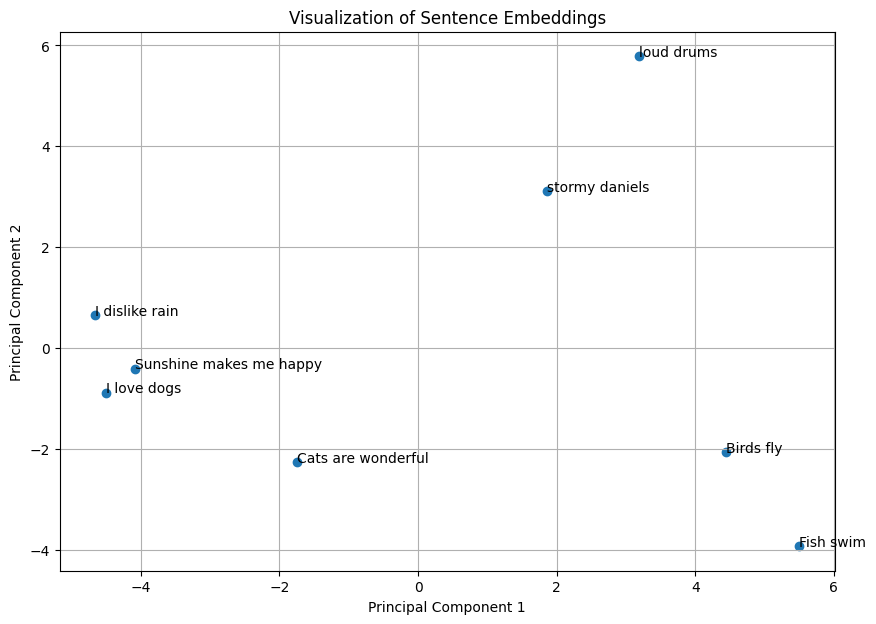

In [ ]:
import matplotlib.pyplot as plt

x = reduced_embeddings[:, 0]
y = reduced_embeddings[:, 1]

plt.figure(figsize=(10, 7))
plt.scatter(x, y, marker='o')

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (x[i], y[i]))

plt.title("Visualization of Sentence Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# GPT-2

## The transition from GPT to GPT-2

The transition from GPT to GPT-2 saw several significant improvements and refinements. Let's break these down step-by-step:

### Step 1: Model Size

**GPT**:
- GPT had around 110 million parameters.

**GPT-2**:
- The largest variant of GPT-2 boasts a whopping 1.5 billion parameters.
- OpenAI also released smaller versions with 125 million, 355 million, and 774 million parameters, respectively.

**Implication**: A larger model size generally allows the model to capture more intricate patterns and relationships in the data. With GPT-2, the increased model size was one of the primary reasons for its enhanced performance in understanding and generating coherent and contextually relevant text.

### Step 2: Training Data and Scale

**GPT**:
- GPT was trained on the BooksCorpus dataset.

**GPT-2**:
- GPT-2 was trained on a larger dataset called WebText, which was extracted from web pages and is considerably larger and more diverse than BooksCorpus.

**Implication**: Training on a more diverse dataset allows the model to capture a wider range of language styles, topics, and nuances.

### Step 3: Model Architecture

While the underlying architecture of both GPT and GPT-2 is based on the Transformer, GPT-2 has refinements in terms of the number of attention heads, layers, etc., especially in its larger variants.

### Step 4: Zero-shot, Few-shot, and Many-shot Learning

With GPT-2, OpenAI showcased the model's ability to perform tasks in:
- **Zero-shot learning**: The model performs a task without any specific examples.
- **Few-shot learning**: The model is given a few examples to infer the task.
- **Many-shot learning**: The model is provided with many examples to understand the task.

This demonstrated GPT-2's capability to generalize from limited data in a way that GPT wasn't specifically highlighted for.

### Step 5: Challenges and Controversies

When GPT-2 was initially released, OpenAI expressed concerns about its potential misuse due to its ability to generate highly convincing fake news articles, impersonate others, or produce harmful content. As a result, OpenAI initially held back the release of the largest model, sharing only the smaller variants. This was a distinction from the GPT release.

### Step 6: Fine-tuning and Adaptability

GPT-2 showcased enhanced adaptability when fine-tuned on specific datasets. While both GPT and GPT-2 can be fine-tuned, GPT-2's larger capacity and training on a diverse dataset made it more effective in adapting to a wider range of tasks.

### Conclusion:

GPT-2 was a significant leap from GPT in terms of model size, training data, and versatility. The advancements in GPT-2 set the stage for even more sophisticated language models, pushing the boundaries of what's possible in the domain of natural language understanding and generation. It highlighted the strengths of scaling up models and training on diverse data while also drawing attention to the potential ethical concerns of such powerful models.

## The evolution of the GPT architecture

The distinction you're pointing out reflects the evolution of the GPT architecture and the different ways in which OpenAI approached the models. Let's break this down step-by-step:

### Step 1: GPT-1 Model Variants

**1. OpenAIGPTModel (Base)**:
- This is the foundational model which outputs raw hidden-states without any specific head on top.
- Primary use: As a building block for the other two variants and for tasks that need contextual embeddings (like sentence embeddings).

**2. OpenAIGPTLMHeadModel (Head)**:
- This has an additional language modeling head on top of the base GPT model.
- Primary use: For tasks like text generation.

**3. OpenAIGPTDoubleHeadsModel (DoubleHead)**:
- This is a more specialized version with two heads: one for language modeling and another for a classification task.
- Primary use: For tasks that combine text generation and classification, like in some conversational AI scenarios.

### Step 2: GPT-2 Model Variants by Size

For GPT-2, OpenAI shifted the focus more towards the size of the model. This was in line with their discovery that, given sufficient data and compute, larger models perform better across a wider range of tasks without task-specific architectures. The variants of GPT-2 are:

**1. `gpt2-small`**:
- The smallest version of GPT-2.

**2. `gpt2-medium`**:
- Intermediate-sized model, offering a balance between computational efficiency and performance.

**3. `gpt2-large` and `gpt2-xl`**:
- The largest publicly available models, delivering the highest performance but also requiring the most computational resources.

### Step 3: The Rationale Behind the Approach

**1. Simplicity and Generalization**: By focusing on model size, OpenAI aimed to create a single model that could excel across a variety of tasks without task-specific modifications. The larger the model, the better it performed on a range of benchmarks.

**2. Ethical Concerns**: OpenAI initially did not release the largest models due to concerns about potential misuse. Over time, as they assessed the risks and benefits, they released increasingly larger models, but not the absolute largest ones.

### Conclusion:

While GPT-1 had a few different model architectures tailored for specific tasks, GPT-2 moved towards a "one size fits all" (or rather, "one architecture, different sizes") approach. The idea was to leverage the power of larger models to handle a variety of tasks without the need for task-specific heads or modifications. This approach aligns with the broader trend in the deep learning community of using larger models and fine-tuning them for specific tasks rather than designing task-specific architectures.

## The different models available for GPT-2

GPT-2 is the successor to GPT and brought about several refinements and improvements. Let's delve into the different models available for GPT-2 and their specifications step-by-step:

### Step 1: Understanding GPT-2's Variants

OpenAI released multiple sizes (or variants) of the GPT-2 model. The primary difference between these variants is the number of parameters (or the model's size).

**GPT-2 Variants**:
1. **`gpt2-small`**: This is the smallest version with 125 million parameters.
2. **`gpt2-medium`**: A medium-sized model with 355 million parameters.
3. **`gpt2-large`**: Larger with 774 million parameters.
4. **`gpt2-xl`**: The largest GPT-2 model with a whopping 1.5 billion parameters.

### Step 2: Use Cases Based on Model Size

1. **Small and Medium Models**:
   - **Pros**: Faster inference, less memory-intensive, suitable for edge devices or applications where response time is crucial.
   - **Cons**: Might not capture the depth of semantic relationships as well as the larger models.
   
2. **Large and XL Models**:
   - **Pros**: Better at capturing intricate language nuances, produce more fluent and coherent text.
   - **Cons**: Computationally intensive, require more memory, can be overkill for simple tasks.

### Step 3: Architectural Details

Apart from the number of parameters, the architectural details like the number of attention heads, the number of layers, etc., also vary across these models. However, the core architecture, which is based on the Transformer, remains consistent across all sizes.

### Step 4: Model Availability and Pre-trained Weights

All these models are available in the Hugging Face model repository, and they come with pre-trained weights. This means they have already been trained on a large corpus of text (like web pages) and can be used out-of-the-box for various NLP tasks or fine-tuned on specific datasets.

### Step 5: Specialized Variants

Apart from the base GPT-2 models, there might be community-contributed models that have been fine-tuned for specific tasks or languages. These specialized variants can be found on the Hugging Face model hub.

### Conclusion:

GPT-2 offers a range of model sizes to cater to different computational needs and tasks. While the core architecture remains consistent, the number of parameters varies, allowing users to make trade-offs between computational efficiency and model performance. As always, the choice of model size should be based on the specific application, the available computational resources, and the desired output quality.

## Use Cases for GPT-2

GPT-2, with its enhanced capabilities compared to GPT-1, has a wide range of use cases. Let's break them down step-by-step:

### Step 1: Text Generation

Given its primary design as a language model, GPT-2 excels at generating coherent, diverse, and contextually relevant text.

**Examples**:
1. **Content Creation**: It can assist writers by generating articles, stories, or poetry.
2. **Dialog Systems**: Used in chatbots and customer support automation to generate human-like responses.

### Step 2: Transfer Learning

GPT-2 can be fine-tuned on a specific dataset to adapt its vast knowledge to specific tasks or domains.

**Examples**:
1. **Specialized Chatbots**: Fine-tuning on medical or legal datasets for domain-specific responses.
2. **Text Classification**: Although primarily a generative model, GPT-2 can be adapted for classification tasks like sentiment analysis.

### Step 3: Text Completion

GPT-2 can complete partial sentences or paragraphs, making it useful for predictive typing applications.

**Examples**:
1. **Code Completion**: Assisting programmers by predicting the next line of code.
2. **Email and Writing Assistants**: Predicting the continuation of sentences for faster typing.

### Step 4: Translation and Language Tasks

While not its primary design, with appropriate prompts, GPT-2 can perform tasks like translation or text summarization.

**Examples**:
1. **Machine Translation**: Translating text between different languages.
2. **Summarization**: Providing concise summaries of longer articles or documents.

### Step 5: Question Answering

GPT-2 can be used to answer questions based on a given context or its pre-trained knowledge.

**Examples**:
1. **Document-based QA**: Answering questions based on a provided document or article.
2. **General QA**: Answering general knowledge questions.

### Step 6: Text-based Gaming and Entertainment

Given its narrative capabilities, GPT-2 can be used in interactive text-based games or storytelling platforms.

**Examples**:
1. **Interactive Stories**: Users can co-write stories with the model, choosing directions and getting generated content in response.
2. **Text-based RPGs**: Role-playing games where the narrative is co-constructed by the player and the model.

### Step 7: Educational and Research Tools

GPT-2 can assist in educational scenarios and research.

**Examples**:
1. **Homework Helpers**: Assisting students in understanding complex topics or providing explanations.
2. **Research Assistance**: Generating content or ideas in academic research.

### Conclusion:

GPT-2, with its advanced capabilities, has a wide range of applications, from content generation to assisting in various professional tasks. Its flexibility and adaptability make it a versatile tool in the NLP domain. However, it's essential to use it responsibly, especially in tasks that can have ethical implications, such as content creation, due to the risk of generating misleading or false information.

## Use Case 1: Text Generation

Let's walk through the process of setting up and running GPT-2 (specifically the `gpt2-small` variant) for text generation on Google Colab:

### Step 1: Install Necessary Libraries
To utilize GPT-2, you'd typically use the Hugging Face's `transformers` library, which provides pre-trained models and tokenizers for a wide range of NLP tasks.

```python
!pip install transformers
```

### Step 2: Import Required Modules
You'll need to import the model and tokenizer specific to GPT-2.

```python
from transformers import GPT2Tokenizer, GPT2LMHeadModel
```

### Step 3: Load the Pre-trained Model and Tokenizer

```python
model_name = "gpt2-small"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
```

### Step 4: Generate Text

Given an initial prompt, you can use the model to generate text. The `generate` method is a versatile tool that allows for various generation strategies.

```python
# Encode the input text to tensor
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generate text
output = model.generate(input_ids, max_length=100, num_return_sequences=1, temperature=1.0)

# Decode the generated text back to readable text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
```

### Step 5 (Optional): Tweak Generation Parameters

You can experiment with various generation parameters:

- `max_length`: Determines the maximum length of the generated text.
- `num_return_sequences`: If you want multiple different continuations, you can increase this number.
- `temperature`: A higher value (e.g., 1.0 or above) makes the output more random, while a lower value (e.g., 0.7 or below) makes it more deterministic.

### Conclusion:

Once you've set up the above code in a Google Colab notebook, you'll be able to generate text using GPT-2's `gpt2-small` variant. You can change the initial prompt or tweak the generation parameters to see different outputs. Remember, since GPT-2 is a powerful model, even the `gpt2-small` variant might take a few moments to generate the text, depending on the length and other parameters.

In [ ]:
import torch

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.2 MB/s eta 0:00:00


In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

In [ ]:
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
# Move the model to the device
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
# Set the padding token for the tokenizer
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'left'

# Encode the input text to tensor
input_text = "Once upon a time"
inputs = tokenizer(input_text, return_tensors="pt", padding="max_length", truncation=True, max_length=100, return_attention_mask=True)

# Move the inputs to the GPU
inputs = {key: value.to(device) for key, value in inputs.items()}

# Generate text with adjusted temperature
output = model.generate(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"], max_length=200, temperature=1.0)

# Decode the generated text back to readable text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)



Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the


## Interesting applications of GPT-2 in a Colab

GPT-2 is versatile and can be employed in various interesting applications. Here are a few use cases that might be intriguing to explore:

### 1. **Story Completion or Expansion**
Provide the beginning of a story and let GPT-2 complete it or expand on it. This can be a fun way to generate creative content and see how the model weaves narratives.

### 2. **Q&A Sessions**
While GPT-2 isn't specifically designed for question-answering like some other models, you can still pose questions to it and receive coherent (if not always accurate) responses. It's an interesting way to see how the model generates information based on its training data.

### 3. **Content Augmentation**
If you're working on a project that needs varied examples of textual content (for training data, perhaps), you can seed GPT-2 with prompts and generate diverse samples.

### 4. **Paraphrasing**
Provide a sentence and get GPT-2 to rephrase it. While it's not specifically a paraphrasing model, it can often provide different ways of expressing the same idea, which can be useful for content creation or data augmentation.

### 5. **Code Comment Generation**
Feed it a line of code, and see if GPT-2 can generate a relevant comment. This can be an engaging way to explore its capabilities in understanding and generating code-related content.

### 6. **Mimicking Styles**
Train GPT-2 (fine-tuning) on specific authors' works or specific genres and see if it can mimic that style when generating new content. This is a more advanced use case but can be very fascinating.

### 7. **Interactive Chatbot**
Create an interactive session where you can converse with GPT-2. Each response from the model can be used as context for the next, allowing for a back-and-forth dialogue.

**Step-by-Step for a Chosen Use Case - Interactive Chatbot**:

1. **Initialize the Model and Tokenizer**:
   As done previously, initialize GPT-2 and its tokenizer.
   
2. **Set up an Interactive Loop**:
   Create a loop where the user can input a message, the model generates a response, and then the user can reply to that, and so on.
   
3. **Maintain Context**:
   To make the conversation flow naturally, maintain the chat history so that the model has context for its replies. This means appending each new message from the user to the conversation history before generating the model's response.
   
4. **Decoding the Model's Response**:
   Use the tokenizer to decode the generated tokens into a coherent message.
   
5. **Display and Continue**:
   Show the model's response and loop back to get the user's next message.

This chatbot can be an entertaining way to interact with GPT-2 and get a sense of its capabilities and quirks in a conversational context.

## Use Case: Chatbot

Creating a chatbot using GPT-2 in a Colab environment can be broken down into the following steps:

### Step 1: Initialization
Load the necessary libraries, set up the GPT-2 model and its tokenizer.

### Step 2: Interactive Loop
Set up a loop for interaction where:
- You input a message.
- The model processes the context and generates a response.
- The response is displayed.
- The process repeats.

### Step 3: Context Management
In order to maintain the flow of the conversation, we'll append each user message and model response to a running chat history. This way, the model has the entire context of the conversation when generating its replies.

Let's implement these steps.

---

### Step-by-Step Code:

**Step 1: Initialization**

```python
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Ensure GPU usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load GPT-2 model and tokenizer
model_name = "gpt2-medium"  # You can also use "gpt2-small" for quicker response times.
model = GPT2LMHeadModel.from_pretrained(model_name).to(device)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
```

**Step 2 & 3: Interactive Loop with Context Management**

```python
chat_history = ""

while True:
    # Get user input
    user_input = input("You: ")
    # Append user input to chat history
    chat_history += f"You: {user_input}\n"
    # Tokenize and process input
    input_tensor = tokenizer.encode(chat_history + "\n", return_tensors='pt', truncation=True, max_length=1024).to(device)
    # Generate response
    with torch.no_grad():
        response_tensor = model.generate(input_tensor, max_length=1024, pad_token_id=tokenizer.eos_token_id, temperature=1.0)
    # Decode and display the model's response
    response = tokenizer.decode(response_tensor[:, input_tensor.shape[-1]:][0], skip_special_tokens=True)
    print(f"GPT-2: {response}")
    # Append model response to chat history
    chat_history += f"GPT-2: {response}\n"
    
    # Optional: Limit the length of chat history to prevent out-of-memory issues
    if len(chat_history) > 2000:
        chat_history = chat_history.split("\n", 1)[-1]
```

Run this code in a Colab cell, and you should be able to have a conversation with the GPT-2 model! Remember, using a larger model variant (like "gpt2-medium" or "gpt2-large") will result in more coherent replies but might take longer to generate responses, especially if not using a GPU.

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Ensure GPU usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load GPT-2 model and tokenizer
model_name = "gpt2-medium"  # You can also use "gpt2-small" for quicker response times.
model = GPT2LMHeadModel.from_pretrained(model_name).to(device)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

In [ ]:
chat_history = ""
iterations = 5  # Number of iterations you want the chat to run

for _ in range(iterations):
    # Get user input
    user_input = input("You: ")
    # Append user input to chat history
    chat_history += f"You: {user_input}\n"
    # Tokenize and process input
    input_tensor = tokenizer.encode(chat_history, return_tensors='pt', truncation=True, max_length=1024).to(device)
    # Generate response
    with torch.no_grad():
        response_tensor = model.generate(input_tensor, max_length=1024, pad_token_id=tokenizer.eos_token_id, temperature=1.0)

    # Extract only the new tokens generated by the model
    num_new_tokens = response_tensor.shape[1] - input_tensor.shape[1]
    response = tokenizer.decode(response_tensor[0][-num_new_tokens:], skip_special_tokens=True)

    print(f"GPT-2: {response}")
    # Append model response to chat history
    chat_history += f"GPT-2: {response}\n"

    # Optional: Limit the length of chat history to prevent out-of-memory issues
    if len(chat_history) > 2000:
        chat_history = chat_history.split("\n", 1)[-1]



You: hello mr
GPT-2: 
Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister: hello mr

Mister

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1262: UserWarning: Input length of input_ids is 1024, but `max_length` is set to 1024. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


GPT-2: ister
You: loop
GPT-2:  say
You: something is wrong here!
GPT-2: 1
You: Awesome chat
GPT-2: :


## Explanation of repetitive behavior of Chatbot

The repetitive behavior can be a bit perplexing. Here's a step-by-step breakdown of why this might happen:

1. **Model's Training Data**: GPT-2 is trained on vast amounts of text from the internet. If certain patterns or phrases are more common in the training data, the model might be biased towards generating them.

2. **Lack of Contextual Understanding**: The model doesn't truly "understand" context as humans do. When it receives input like "hello mr", it might latch onto that pattern and simply repeat it, thinking it's a valid response given the limited context it has.

3. **Temperature Setting**: The `temperature` parameter in the `generate` function controls the randomness of the model's outputs. A higher value makes the output more random, while a lower value makes it more deterministic. If the temperature is set too low, the model might end up in a loop, generating the same or similar text repeatedly. Adjusting this parameter might help in producing varied outputs.

4. **Max Length and Top-K Sampling**: Other parameters that can influence the diversity of the generated text are the `max_length` and sampling strategies like `top_k` or `top_p`. By limiting the choices the model can pick from, or by truncating its output, we might inadvertently be promoting repetitive behavior.

5. **Accumulated Chat History**: In our chatbot loop, we keep appending the model's output to the chat history. If the model starts generating repetitive text, that repetitive content becomes part of the subsequent input, exacerbating the issue.

6. **GPT-2's Limitations**: Even though GPT-2 is impressive, it's not perfect. It can generate coherent passages of text, but it can also generate gibberish or fall into repetitive patterns. The behavior is partly a reflection of its training data and the inherent limitations of the model.

To improve the chatbot:

- **Temperature Adjustment**: Try adjusting the `temperature` parameter to introduce more randomness.
- **Introduce Breaks**: If the model starts repeating itself, you can introduce logic to break out of the loop or change its response.
- **Limit Chat History**: Instead of always appending to the chat history, consider using only the most recent messages to prevent old, repetitive outputs from influencing new ones.

Remember, while GPT-2 is a leap forward from its predecessor, it's still not perfect. It's a tool that can generate human-like text but doesn't truly understand the content it's producing.

# GPT-3

## OpenAI provides access to GPT-3 through their API

As of my last update in September 2021, OpenAI has not released the weights for GPT-3 on the Hugging Face model hub. This means that while there are tokenizers and configuration files for GPT-3 on Hugging Face (to allow users to use their own trained versions), the pre-trained models from OpenAI are not available there.

However, OpenAI provides access to GPT-3 through their API, which allows developers to integrate GPT-3 into applications, products, or services.

It's always a good idea to check the official Hugging Face model hub or OpenAI's official resources to see if there have been any updates regarding GPT-3's availability.

# Glossary

## `torch.nn.BCELoss`

### Step 1: Understanding BCELoss

`nn.BCELoss` stands for Binary Cross-Entropy Loss. It's a loss function commonly used in binary classification tasks, where the objective is to classify instances into one of two classes.

Given:
- \( p \): The predicted probability of the instance belonging to class 1.
- \( y \): The true label of the instance (either 0 or 1).

The formula for binary cross-entropy for a single instance is:

$$
-\left( y \cdot \log(p) + (1-y) \cdot \log(1-p) \right)
$$

If \( y = 1 \) (i.e., the true label is class 1), the loss becomes \( -\log(p) \), meaning the closer \( p \) is to 1, the lower the loss. Conversely, if \( y = 0 \), the loss is \( -\log(1-p) \), implying the closer \( p \) is to 0, the lower the loss.

### Step 2: An Analogy

Imagine you're teaching a child the difference between hot and cold temperatures using a thermometer. Every time they make a guess, you correct them, and the further their guess is from the actual temperature, the more you emphasize their mistake.

- If the actual temperature is hot (let's say this is equivalent to class 1), and they guess it's very cold (a probability close to 0), you'd correct them quite firmly because they're way off.
  
- Similarly, if the actual temperature is cold (equivalent to class 0), and they guess it's boiling hot (a probability close to 1), you'd again correct them with emphasis.

- But, if their guesses are close to the actual temperature, your corrections would be gentle.

In this analogy:
- The child's guess is the predicted probability \( p \).
- The actual temperature is the true label \( y \).
- The firmness or gentleness of your correction is the BCELoss. The further the guess is from the truth, the higher the loss.

### Step 3: Why Use BCELoss?

- It's continuous: Even a small change in prediction can lead to a change in loss, which helps models make incremental improvements.
  
- It penalizes confident wrong predictions: If the model predicts a high probability for the incorrect class, the loss will be high.
  
- It's differentiable: This is important for optimization algorithms (like gradient descent) to work.

In conclusion, `nn.BCELoss` is a measure of how far off our model's predictions are from the truth in binary classification tasks. It penalizes wrong predictions, especially those made with high confidence, guiding the model to improve its predictions over time.